In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns


In [2]:
#Load the previous saved dataset for visualization
data_df = pd.read_csv('./source/Dataset/analysis_copy.csv')

In [3]:
data_df.head()

,date,country,id,active,alco,ap_hi,ap_lo,cholesterol,gender,gluc,...,occupation,smoke,weight,disease,age_years,bmi,bp_normal,bp_elevated,bp_hypertension1,bp_hypertension2
0,2021-05-03,Indonesia,0,1,0,110,80,1,2,1,...,Architect,0,62.0,0,50,21.967120,0,0,1,0
1,2021-08-05,Malaysia,1,1,0,140,90,3,1,1,...,Accountant,0,85.0,1,55,34.927679,0,0,0,1
2,2022-11-13,Indonesia,2,0,0,130,70,3,1,1,...,Chef,0,64.0,1,51,23.507805,0,0,1,0
3,2018-10-31,Singapore,3,1,0,150,100,1,2,1,...,Lawyer,0,82.0,1,48,28.710479,0,0,0,1
4,2020-09-25,Singapore,4,0,0,100,60,1,1,1,...,Architect,0,56.0,0,47,23.011177,1,0,0,0


In [4]:
data_df.age_years.unique()

array([50, 55, 51, 48, 47, 60, 61, 54, 40, 39, 45, 58, 59, 63, 64, 53, 49,
       57, 56, 46, 43, 62, 52, 42, 44, 41, 29, 30])

STUDY GROUP A: AGE GROUP 30s

In [5]:
data_40_df = data_df[(data_df.age_years > 40) & (data_df.age_years < 49) & (data_df.disease == 0)]
#data_30_df = data_df[(data_df.age_years > 59) & (data_df.disease == 1)]
data_40_df.shape

(8862, 21)

In [6]:
data_40_df.age_years.unique()

array([47, 48, 45, 46, 43, 41, 44, 42])

In [7]:
#define the number males and females
gender_count = data_40_df['gender'].value_counts()
gender_count

gender
1    5501
2    3361
Name: count, dtype: int64

In [11]:
#First create sample of evenly balanced Males and Females
males = data_40_df[data_40_df['gender'] == 2].sample(n=500, random_state=42)
females = data_40_df[data_40_df['gender'] == 1].sample(n=500, random_state=42)

balanced_dataset = pd.concat([males, females])

len(balanced_dataset)


1000

In [13]:
data_40_df = balanced_dataset

What are they habit?

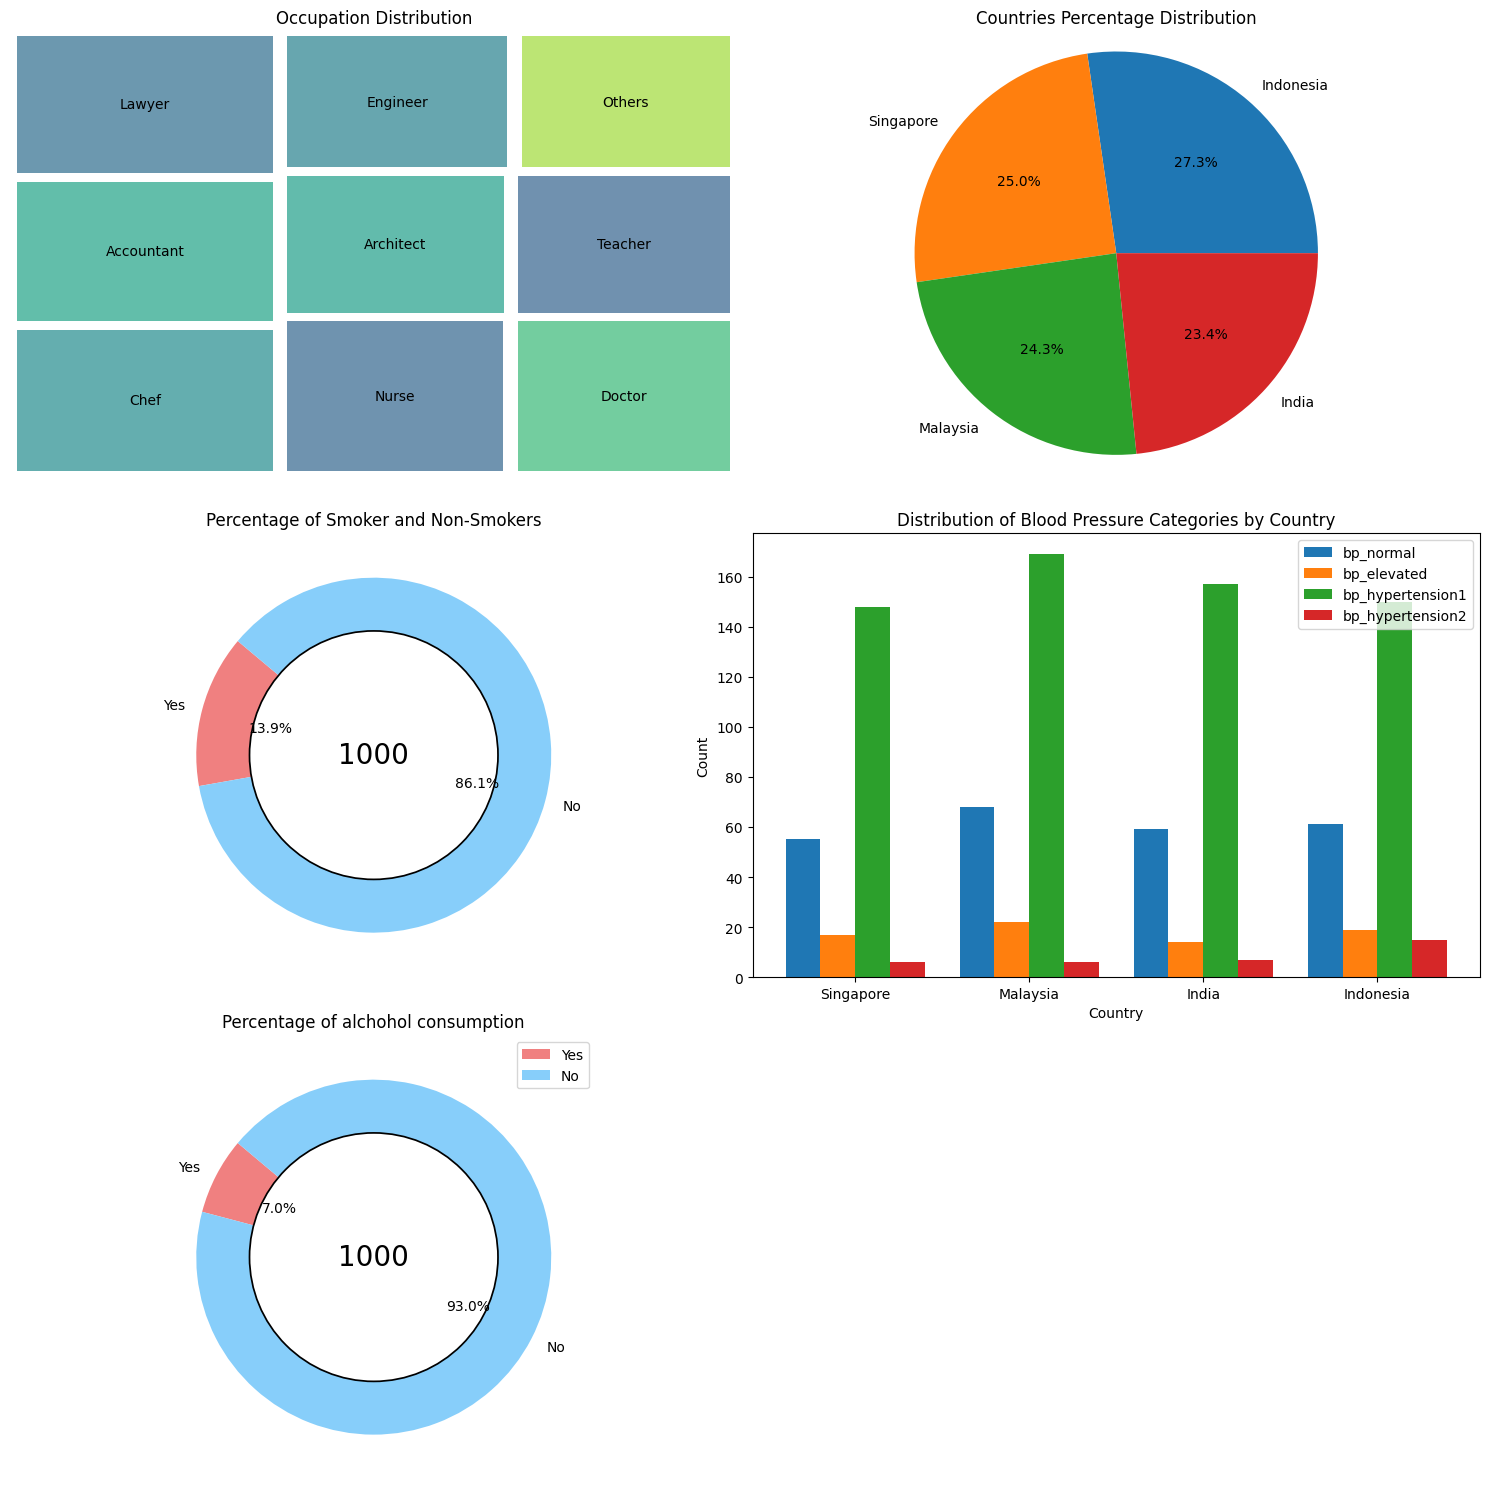

In [15]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)

occupation_counts = data_40_df.occupation.value_counts()

# Create bar chart
#plt.bar(occupation_counts.index, occupation_counts.values)
squarify.plot(sizes=occupation_counts.values, label=occupation_counts.index, alpha=0.7, pad= 0.25)

plt.axis("off")

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Occupation Distribution')


#2
plt.subplot(3,2,2)
country_counts = data_40_df.country.value_counts()

# Create pie chart
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Countries Percentage Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


#Chart 3
plt.subplot(3,2,3)

no_of_1s = len(data_40_df[data_40_df['smoke'] == 1])
no_of_0s = len(data_40_df[data_40_df['smoke'] == 0])

#no_of_0s = 20
#no_of_1s = 80

total_smokecount = no_of_0s + no_of_1s

labels = ['Yes', 'No']
sizes = [no_of_1s, no_of_0s]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
#plt.pie(sizes, labels, colors, autopct='%1.1f%%', startangle=140)
centerpie = plt.Circle((0,0), 0.7, color='black', fc='white', linewidth=1.25, )
pie_fig = plt.gcf()
pie_fig.gca().add_artist(centerpie)

plt.title("Percentage of Smoker and Non-Smokers")
plt.text(0,0, total_smokecount, ha='center', va='center', fontsize=20)


#chart4
plt.subplot(3,2,4)

categories = ['bp_normal', 'bp_elevated', 'bp_hypertension1', 'bp_hypertension2']
counts_by_category = [data_40_df[category].sum() for category in categories]

# Define countries
countries = data_40_df['country'].unique()

# Group data by category and country
grouped_data = data_40_df.groupby(['country'])[categories].sum()

# Plot bar chart with hue by country
bar_width = 0.2
for i, category in enumerate(categories):
    plt.bar([x + i * bar_width for x in range(len(countries))], grouped_data[category], width=bar_width, label=category)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Blood Pressure Categories by Country')
plt.xticks([r + bar_width * (len(categories) - 1) / 2 for r in range(len(countries))], countries)
plt.legend()



#chart5
plt.subplot(3,2,5)
#smoke_counts = data_30_df['smoke'].value_counts()
#smoke_counts = data_30_df['smoke']

no_of_1s = len(data_40_df[data_40_df['alco'] == 1])
no_of_0s = len(data_40_df[data_40_df['alco'] == 0])

#no_of_0s = 20
#no_of_1s = 80

total_alcocount = no_of_0s + no_of_1s

labels = ['Yes', 'No']
sizes = [no_of_1s, no_of_0s]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
#plt.pie(sizes, labels, colors, autopct='%1.1f%%', startangle=140)
centerpie = plt.Circle((0,0), 0.7, color='black', fc='white', linewidth=1.25, )
pie_fig = plt.gcf()
pie_fig.gca().add_artist(centerpie)

plt.title("Percentage of alchohol consumption")
plt.text(0,0, total_alcocount, ha='center', va='center', fontsize=20)

plt.legend()
#plt.xticks(x, categories)
plt.tight_layout()

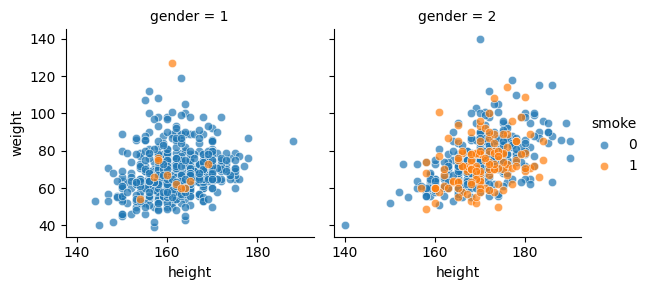

In [16]:
#sns.jointplot(x=data_30_df['height'], y=data_30_df['weight'], data=data_30_df, kind='scatter')
graph = sns.FacetGrid(data_40_df, col='gender', hue='smoke')
graph.map(sns.scatterplot, 'height', 'weight', alpha=0.7)

graph.add_legend()

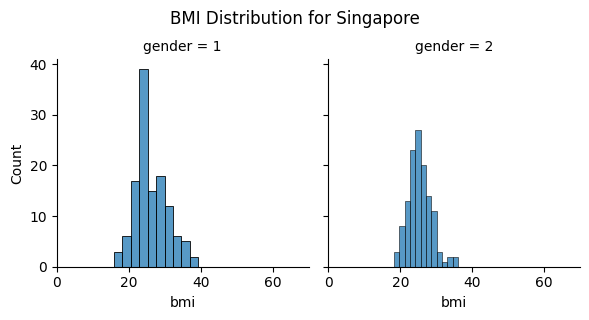

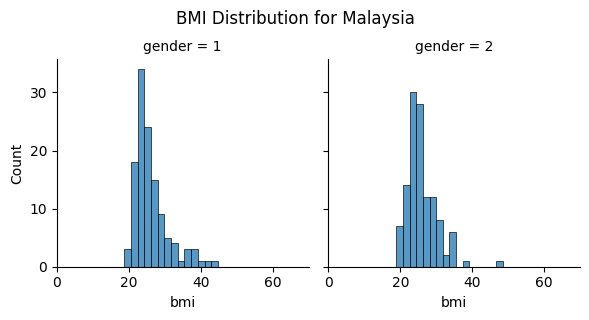

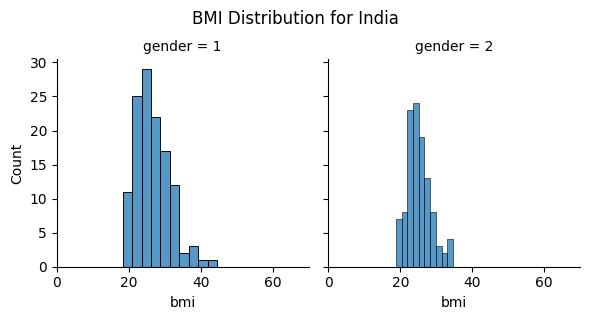

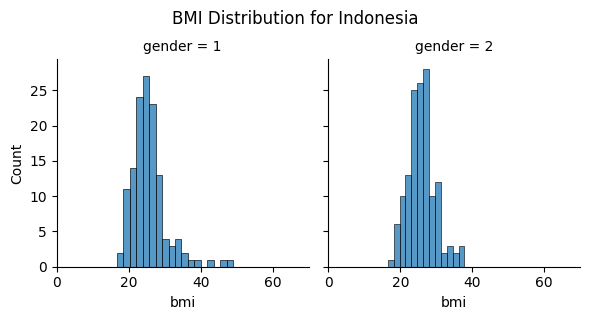

In [17]:
#Plotting BMI for each country
for country in data_40_df['country'].unique():

    graph3 = sns.FacetGrid(data=data_40_df[data_40_df['country']==country], col="gender")
    plt.xlim(0, 70)
    graph3.map(sns.histplot, 'bmi')
    #graph3.add_legend()
    plt.suptitle(f"BMI Distribution for {country}", y=1.05)


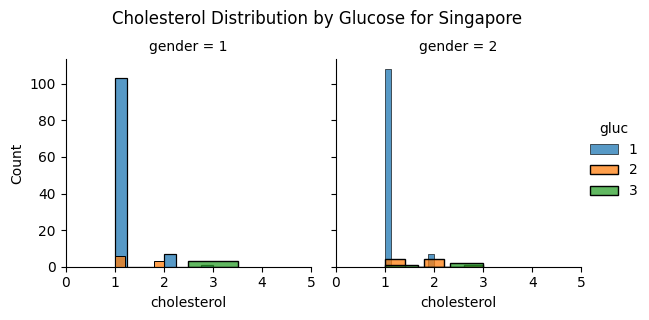

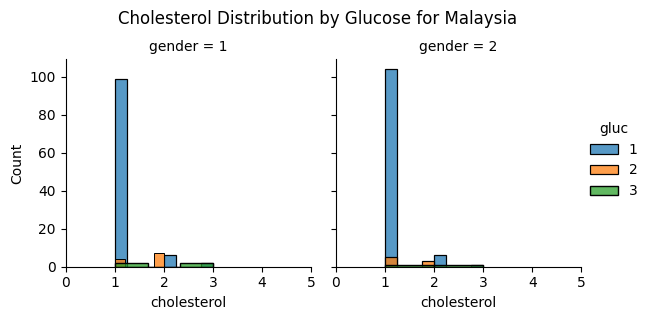

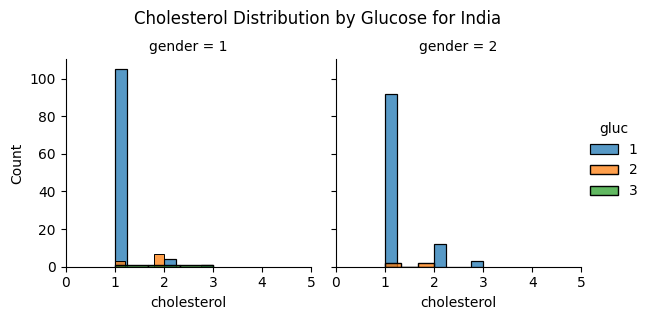

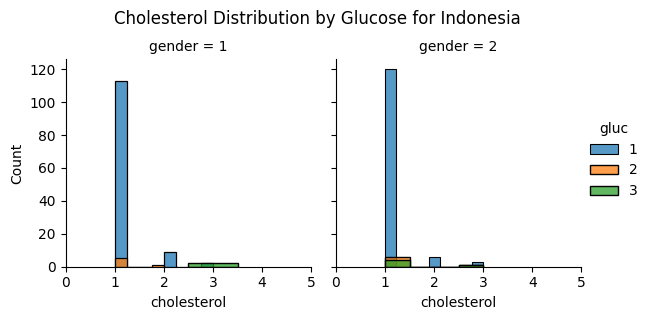

In [18]:
#Plotting BMI for each country
for country in data_40_df['country'].unique():

    graph3 = sns.FacetGrid(data=data_40_df[data_40_df['country']==country], col="gender", hue='gluc')
    plt.xlim(0, 5)
    graph3.map(sns.histplot, 'cholesterol')
    graph3.add_legend()
    plt.suptitle(f"Cholesterol Distribution by Glucose for {country}", y=1.05)

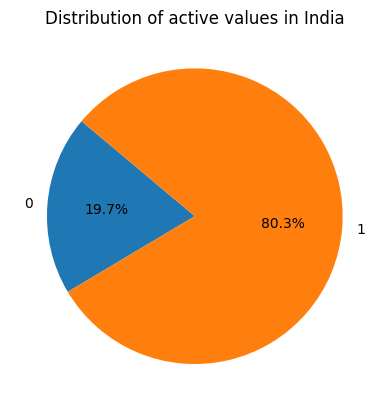

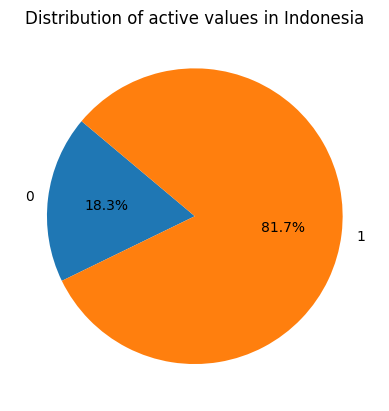

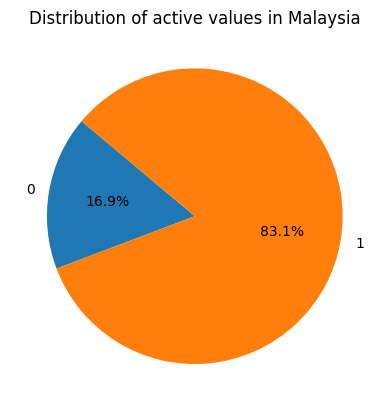

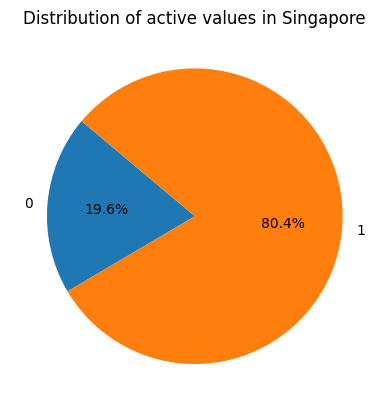

In [19]:
grouped = data_40_df.groupby('country')['active'].value_counts(normalize=True).unstack()

for country in grouped.index:
    sizes = grouped.loc[country].values
    labels = ['0', '1']
    plt.figure()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of active values in {}'.format(country))

plt.show()